In [1]:
import os
import segyio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Nécessaire pour 3D
from pyvista import demos
import pyvista as pv

In [2]:
os.chdir("/Users/patrickilunga/seam_project")

In [3]:
filename = "data/raw/SEAM_Interpretation_Challenge_1_2DSparseGathers_Depth.sgy"

In [4]:
print(f"Chemin utilisé : {filename}")

Chemin utilisé : data/raw/SEAM_Interpretation_Challenge_1_2DSparseGathers_Depth.sgy


In [18]:
with segyio.open(filename, ignore_geometry=True) as f:
    traces = f.trace.raw[:150].astype(np.float32)  # On prend les 100 premières traces

print(f"Dimensions des traces : {traces.shape}")

Dimensions des traces : (150, 751)


In [19]:
# Dimensions
n_traces, n_samples = traces.shape
n_offsets = 2  # On crée 2 plans (offsets) pour avoir une vraie 3D

In [6]:
# On crée des indices X, Y pour simuler une géométrie 3D
x = np.arange(traces.shape[1])  # échantillons (profondeur)
y = np.arange(traces.shape[0])  # numéros de trace (position horizontale)

# Création d'un meshgrid
X, Y = np.meshgrid(x, y)
Z = traces  # Amplitude comme hauteur

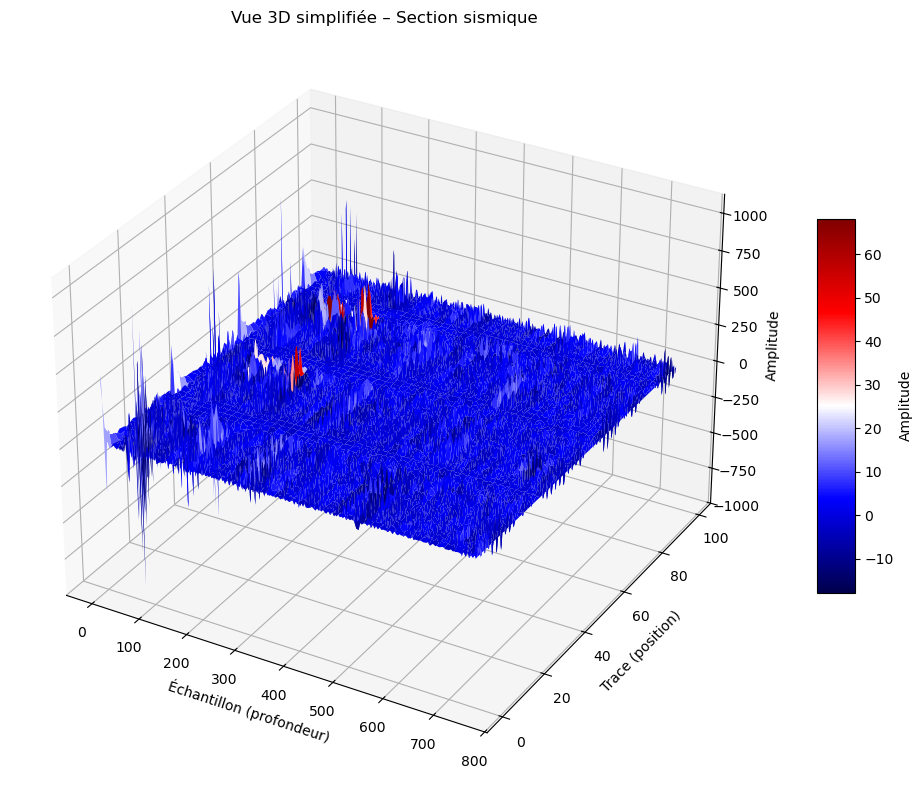

In [25]:
# Visualisation 3D avec Matplotlib

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface 3D
surf = ax.plot_surface(X, Y, Z, cmap='seismic', linewidth=0, antialiased=True)

ax.set_title("Vue 3D simplifiée – Section sismique")
ax.set_xlabel("Échantillon (profondeur)")
ax.set_ylabel("Trace (position)")
ax.set_zlabel("Amplitude")

plt.colorbar(surf, shrink=0.5, aspect=10, label="Amplitude")
plt.tight_layout()
plt.show()

In [34]:
# Coordonnées converties en float32
x = np.arange(traces.shape[1], dtype=np.float32)
y = np.arange(traces.shape[0], dtype=np.float32)

In [35]:
X, Y = np.meshgrid(x, y)
Z = traces.astype(np.float32)

In [36]:
# Création du maillage
grid = pv.StructuredGrid(X, Y, np.zeros_like(Z))
grid['amplitude'] = Z.ravel(order='F')

In [38]:
# Visualisation
grid.plot(
    scalars='amplitude',
    cmap='seismic',
    show_edges=False,
    notebook=False,
    show_grid=True
)

In [20]:
# Visualisation en volume (Volume Rendering)

# Coordonnées X (trace), Y (offset), Z (profondeur)
x = np.arange(n_traces, dtype=np.float32)            # Axe X : Traces
y = np.linspace(0, 1, n_offsets, dtype=np.float32)   # Axe Y : Offsets (minimum 2)
z = np.arange(n_samples, dtype=np.float32)           # Axe Z : Profondeur

# Création d'un mesh 3D valide
x3d, y3d, z3d = np.meshgrid(x, y, z, indexing='ij')


In [22]:

# On étend la dimension offset et on reshape correctement
amp_volume = np.repeat(traces[np.newaxis, :, :], repeats=n_offsets, axis=0)  # shape: (2, 50, 751)

# Création du volume 3D
grid = pv.StructuredGrid(x3d, y3d, z3d)
grid.point_data['amplitude'] = amp_volume.ravel(order='F')  # Aplatir en ordre Fortran

/opt/anaconda3/envs/seam-env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


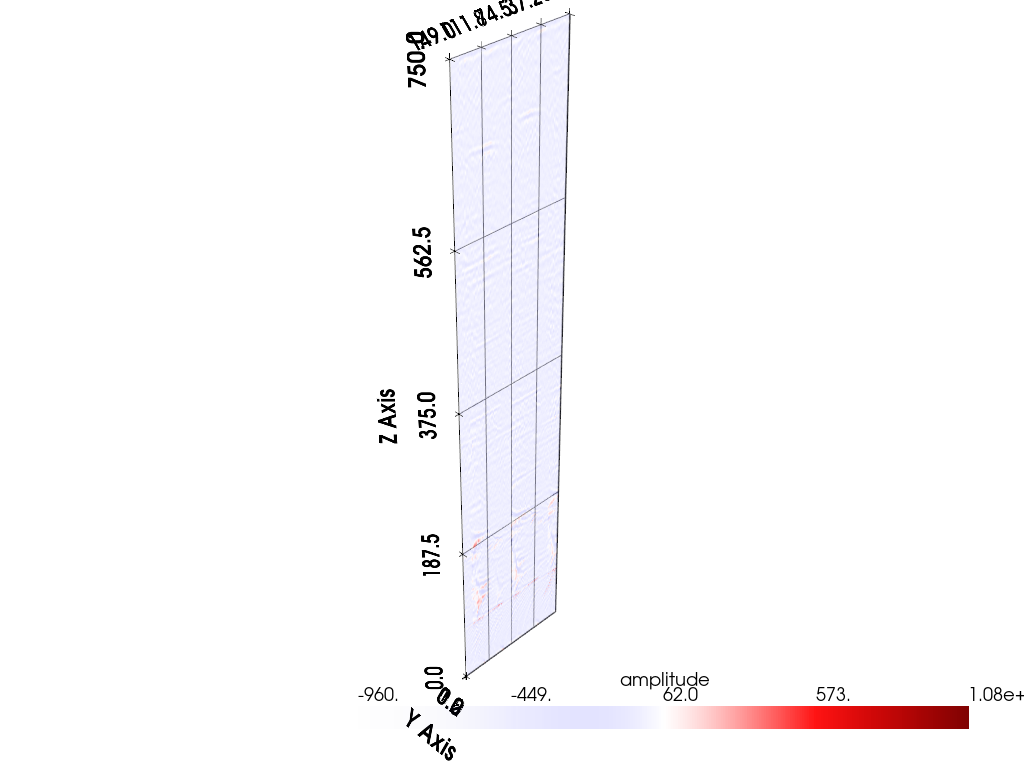

In [26]:
# Visualisation en volume

pl = pv.Plotter()
pl.add_volume(grid, scalars='amplitude', cmap='seismic', opacity='sigmoid_5')
pl.show_grid()
pl.show()